In [28]:
# Visual for any one station by each day of the week
%pylab inline 

import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
import datetime

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_style("white")

Populating the interactive namespace from numpy and matplotlib


In [29]:
df = pd.read_csv('output_stage2.csv',parse_dates=['DATETIME'])
df.drop('Unnamed: 0',axis =1, inplace = True)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,ENTRY_DIFF,EXIT_DIFF
0,H007,R248,00-00-00,1 AV,L,BMT,04/28/2018,04:00:00,REGULAR,13470247,15069262,2018-04-28 04:00:00,90.0,294.0
1,H007,R248,00-00-00,1 AV,L,BMT,04/28/2018,08:00:00,REGULAR,13470336,15069583,2018-04-28 08:00:00,89.0,321.0
2,H007,R248,00-00-00,1 AV,L,BMT,04/28/2018,12:00:00,REGULAR,13470882,15070622,2018-04-28 12:00:00,546.0,1039.0
3,H007,R248,00-00-00,1 AV,L,BMT,04/28/2018,16:00:00,REGULAR,13471623,15071910,2018-04-28 16:00:00,741.0,1288.0
4,H007,R248,00-00-00,1 AV,L,BMT,04/28/2018,20:00:00,REGULAR,13472316,15073470,2018-04-28 20:00:00,693.0,1560.0


In [31]:
turnstile =['STATION', 'UNIT', 'C/A', 'SCP']
df[turnstile].nunique()

STATION    376
UNIT       466
C/A        735
SCP        203
dtype: int64

In [32]:
df_clean = df[['STATION', 'UNIT', 'C/A', 'SCP','DATE','ENTRY_DIFF','EXIT_DIFF']]
df_clean.head()

,STATION,UNIT,C/A,SCP,DATE,ENTRY_DIFF,EXIT_DIFF
0,1 AV,R248,H007,00-00-00,04/28/2018,90.0,294.0
1,1 AV,R248,H007,00-00-00,04/28/2018,89.0,321.0
2,1 AV,R248,H007,00-00-00,04/28/2018,546.0,1039.0
3,1 AV,R248,H007,00-00-00,04/28/2018,741.0,1288.0
4,1 AV,R248,H007,00-00-00,04/28/2018,693.0,1560.0


In [33]:
df_clean['DATE'] = pd.to_datetime(df_clean['DATE'], format="%m/%d/%Y")

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
# df_flat = df_clean.groupby(['STATION', 'UNIT', 'C/A', 'SCP','DATE']).sum()
# df_flat.head()

In [34]:
station ='14 ST-UNION SQ' # change once u get
station_data = df_clean.loc[df_clean['STATION'] == station,['DATE','ENTRY_DIFF','EXIT_DIFF']]
station_data.head()

,DATE,ENTRY_DIFF,EXIT_DIFF
105770,2018-04-28,9.0,11.0
105771,2018-04-28,3.0,120.0
105772,2018-04-28,59.0,505.0
105773,2018-04-28,217.0,946.0
105774,2018-04-28,214.0,729.0


In [40]:

# use reset_index to create a dataframe from a groupby object
# df_mta_daily_entries = df_mta.groupby(['C/A', 'SCP', 'DATE'])['ENTRY_DIFF'].sum().reset_index()
# df_mta_daily_entries

data = station_data.groupby(station_data['DATE'].dt.weekday).mean()
#df = df.groupby([df['Date_Time'].dt.date]).mean()

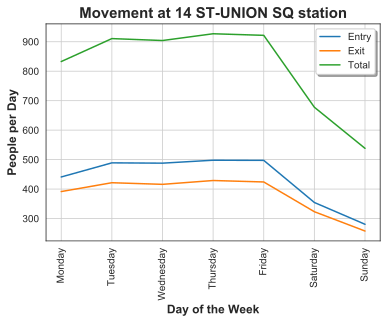

In [44]:
markers = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.plot(data);
plt.plot(data['ENTRY_DIFF']+data['EXIT_DIFF'])
plt.grid()
ticks_x = np.linspace(0, 6, 7)
plt.xticks(ticks_x, markers, rotation=90);
plt.ylabel("People per Day",fontsize = 12, weight = 'bold')
plt.xlabel("Day of the Week",fontsize = 12, weight = 'bold')
plt.title("Movement at "+ station +" station",fontsize = 15, weight = 'bold')
plt.legend(['Entry','Exit','Total'],shadow = True, loc = 0);
plt.savefig('week_'+station+'.pdf')